In [46]:
import os
import requests
from PIL import Image
import torch
import glob
import numpy as np
import xmltodict
import pprint
import json

from skimage import draw
import numpy as np

import matplotlib.pyplot as plt 


In [47]:
def poly2mask(vertex_row_coords, vertex_col_coords, shape):
    fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, shape)
    mask = np.zeros(shape)
    mask[fill_row_coords, fill_col_coords] = 1
    return mask

# parse annotations

In [48]:
img_dir      = "/WorkSpace-2/aroy/data/datasets/out_of_context_MIT/images/"
xml_filepath = "/WorkSpace-2/aroy/data/datasets/out_of_context_MIT/annotations/im001.xml"

with open(xml_filepath) as fd:
    annotation_dict = xmltodict.parse(fd.read())
    annotation_dict = annotation_dict['annotation']
    
filename = annotation_dict['filename']
img_size = annotation_dict['imagesize']
object_annotations  = annotation_dict['object']

img_filepath = os.path.join(img_dir, filename)

# get object and OOC annotations
object_annotation_list = ['']*len(object_annotations)
for indx, object_annotation in enumerate(object_annotations):
    ooc_flag = 0
    
    obj_name = object_annotation['name']
    if 'outofcontext' in obj_name:
        ooc_flag = 1
    
    # get polygon
    polygon = object_annotation['polygon']['pt']
    x_list = ['']*len(polygon)
    y_list = ['']*len(polygon)

    for pt_indx, pt in enumerate(polygon):
        x_list[pt_indx] = int(pt['x'])
        y_list[pt_indx] = int(pt['y'])
    
    object_annotation_list[indx] = {'obj_name': obj_name,
                               'ooc_flag': ooc_flag,
                               'polygon' : polygon,
                               'x_list'  : x_list, # column
                               'y_list'  : y_list  # row
                              }

# Visualization

(251, 222)


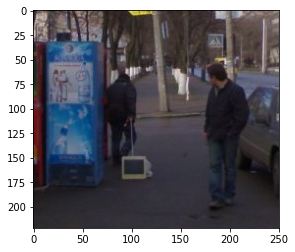

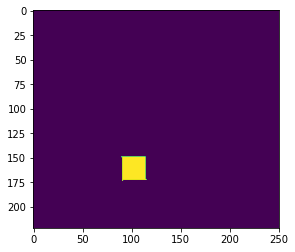

In [62]:
object_annotation = object_annotation_list[0]

# load the image
img = Image.open(img_filepath)
plt.imshow(img)
print(img.size)

mask = poly2mask(object_annotation['y_list'], object_annotation['x_list'], ( int(img_size['nrows']), int(img_size['ncols']) ))
plt.figure()
plt.imshow(mask)

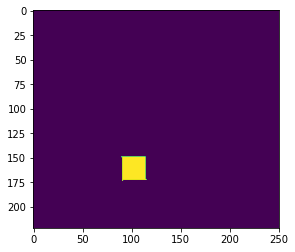